In [2]:
using MimiCIAM
using Mimi
using PlotlyJS
using NetCDF
using CSV
using DataFrames
using StatsPlots
using Colors

WebIO._IJuliaInit()

In [4]:
ais_126_f = Matrix(CSV.read("SLR_Manip/ais_126_f.csv", DataFrame))
ais_245_f = Matrix(CSV.read("SLR_Manip/ais_245_f.csv", DataFrame))
ais_585_f = Matrix(CSV.read("SLR_Manip/ais_585_f.csv", DataFrame))

gsic_126_f = Matrix(CSV.read("SLR_Manip/gsic_126_f.csv", DataFrame))
gsic_245_f = Matrix(CSV.read("SLR_Manip/gsic_245_f.csv", DataFrame))
gsic_585_f = Matrix(CSV.read("SLR_Manip/gsic_585_f.csv", DataFrame))

gis_126_f = Matrix(CSV.read("SLR_Manip/gis_126_f.csv", DataFrame))
gis_245_f = Matrix(CSV.read("SLR_Manip/gis_245_f.csv", DataFrame))
gis_585_f = Matrix(CSV.read("SLR_Manip/gis_585_f.csv", DataFrame))

te_126_f = Matrix(CSV.read("SLR_Manip/te_126_f.csv", DataFrame))
te_245_f = Matrix(CSV.read("SLR_Manip/te_245_f.csv", DataFrame))
te_585_f = Matrix(CSV.read("SLR_Manip/te_585_f.csv", DataFrame))

lws_126_f = Matrix(CSV.read("SLR_Manip/lws_126_f.csv", DataFrame))
lws_245_f = Matrix(CSV.read("SLR_Manip/lws_245_f.csv", DataFrame))
lws_585_f = Matrix(CSV.read("SLR_Manip/lws_585_f.csv", DataFrame))

gmsl_126_f = Matrix(CSV.read("SLR_Manip/gmsl_126_f.csv", DataFrame))
gmsl_245_f = Matrix(CSV.read("SLR_Manip/gmsl_245_f.csv", DataFrame))
gmsl_585_f = Matrix(CSV.read("SLR_Manip/gmsl_585_f.csv", DataFrame))

101×20000 Matrix{Float64}:
 0.0         0.0         0.0         …  0.0         0.0         0.0
 0.00438309  0.00366631  0.00266486     0.00247878  0.00246012  0.00280951
 0.00859296  0.00742525  0.00536461     0.00493599  0.00490522  0.00577977
 0.0129887   0.0112176   0.00821852     0.00743868  0.00745487  0.00876214
 0.0174522   0.0150735   0.0112117      0.0100242   0.00998998  0.0118764
 0.0222239   0.0189934   0.0142248   …  0.0128344   0.0126003   0.0150932
 0.0267074   0.0229777   0.017392       0.0155632   0.0152564   0.0183832
 0.034361    0.0266802   0.0158436      0.0136611   0.0179931   0.0222257
 0.0381423   0.0309298   0.0213616      0.0193219   0.0187832   0.0251798
 0.0427735   0.0359745   0.0264052      0.0239388   0.0222166   0.0287182
 0.0468136   0.0402368   0.0309132   …  0.0266519   0.026384    0.0324481
 0.0513949   0.0439526   0.0352083      0.0296168   0.0294717   0.0363131
 0.0554635   0.0478334   0.0399851      0.0330939   0.0332751   0.0404325
 ⋮            

In [6]:
years = []
for i in range(2000, 2100)
    push!(years, i)
end

In [10]:
size(ais_126_f, 1)

101

Contribution

In [19]:
function make_boxplot(year, dataset, ssprcp, set)
    data = dataset[year - 1999, :]

    newarray = []
    n = 1
    while n < length(data)
        push!(newarray, data[n:n+999])
        n = n + 1000
    end
    str = string(set, "_", ssprcp)
    boxplot(newarray, legend = false, showxaxis = true, xlabel = "Model", ylabel = "Sea Level Rise", title = "Contribution of $str in $year")
    StatsPlots.savefig(string(str, "_contribution_", year))
   
end

make_boxplot (generic function with 1 method)

In [21]:
make_boxplot(2100, ais_245_f, 245, "ais")
make_boxplot(2100, gsic_245_f, 245, "gsic")
make_boxplot(2100, gis_245_f, 245, "gis")
make_boxplot(2100, te_245_f, 245, "te")
make_boxplot(2100, lws_245_f, 245, "lws")
make_boxplot(2100, gmsl_245_f, 245, "gmsl")

"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\gmsl_245_contribution_2100.png"

LSLR

In [7]:
lslr_126 = Matrix(CSV.read("data/lslr_126_downscale_gulf.csv", DataFrame))
lslr_245 = Matrix(CSV.read("data/lslr_245_downscale_gulf.csv", DataFrame))
lslr_585 = Matrix(CSV.read("data/lslr_585_downscale_gulf.csv", DataFrame))


3560000×11 Matrix{Float64}:
 0.0  0.0433786  0.0903373  0.149018   …  0.61226   0.753352  0.914571
 0.0  0.0382319  0.0796949  0.131742      0.496972  0.596917  0.710664
 0.0  0.0297117  0.0698332  0.12245       0.577961  0.709547  0.858775
 0.0  0.0340152  0.0678793  0.112909      0.469191  0.582631  0.714524
 0.0  0.0361237  0.0737898  0.120489      0.479576  0.588217  0.712896
 0.0  0.0342238  0.0740326  0.123319   …  0.54176   0.672914  0.820784
 0.0  0.0411705  0.0903472  0.148705      0.646423  0.804723  0.979057
 0.0  0.0396064  0.0855681  0.136849      0.555424  0.683258  0.828721
 0.0  0.0360523  0.0792902  0.128054      0.537844  0.666145  0.806362
 0.0  0.0501849  0.104336   0.166025      0.688532  0.850785  1.03072
 0.0  0.0272168  0.0609361  0.102562   …  0.411084  0.492535  0.58111
 0.0  0.0292357  0.0615669  0.101233      0.378732  0.44841   0.526898
 0.0  0.0397024  0.0826066  0.133475      0.54328   0.670451  0.821261
 ⋮                                     ⋱           

In [19]:
RGB(0/255,52/255,102/255)

In [85]:
lslr_126[((20000*27) + 1):(20000(28)),6]

20000-element Vector{Float64}:
 0.27179500802158374
 0.22504645424672484
 0.2488184183637423
 0.20697890930242852
 0.21943336328304952
 0.23649763865125722
 0.258556257474411
 0.25265423580603436
 0.2308699638181262
 0.29377522986704346
 0.18118334398420366
 0.17547802485306307
 0.23590123660087575
 ⋮
 0.20475925683906382
 0.20061828867444315
 0.1594003644997375
 0.12585783583592947
 0.2077594661326156
 0.21255088440834338
 0.20313179312927634
 0.19570097454826094
 0.18931535365011387
 0.18935035336769623
 0.1555593946664293
 0.2352252829517474

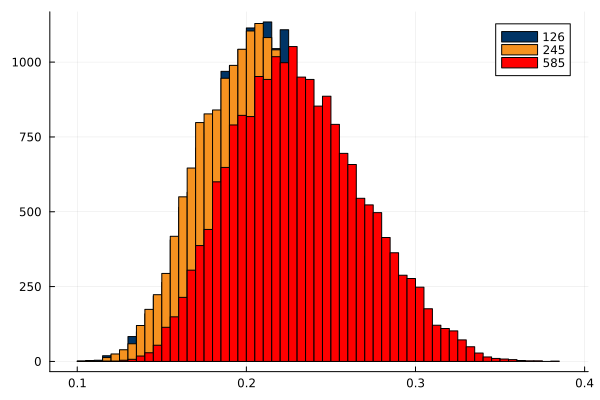

In [86]:
StatsPlots.histogram(lslr_126[((20000*27) + 1):(20000(28)),6], color = RGB(0/255,52/255,102/255), label = "126")
StatsPlots.histogram!(lslr_245[((20000*27) + 1):(20000(28)),6], color = RGB(246/255,146/255,32/255), label = "245")
StatsPlots.histogram!(lslr_585[((20000*27) + 1):(20000(28)),6], color = RGB(255/255,0/255,0/255), label = "585")



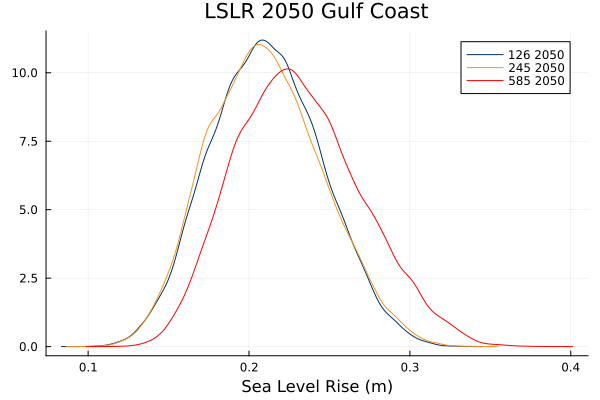

In [104]:
using KernelDensity

StatsPlots.plot(kde(lslr_126[((20000*27) + 1):(20000(28)),6]),color = RGB(0/255,52/255,102/255), label = "126 2050", title = "LSLR 2050 Gulf Coast", xlabel = "Sea Level Rise (m)")
StatsPlots.plot!(kde(lslr_245[((20000*27) + 1):(20000(28)),6]),color = RGB(246/255,146/255,32/255), label = "245 2050")
StatsPlots.plot!(kde(lslr_585[((20000*27) + 1):(20000(28)),6]),color = RGB(255/255,0/255,0/255), label = "585 2050")

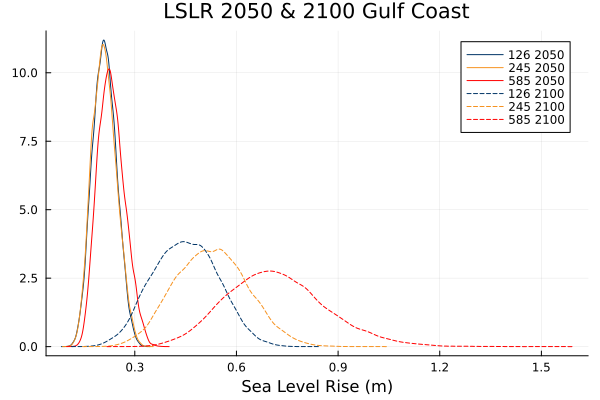

In [105]:
StatsPlots.plot!(kde(lslr_126[((20000*27) + 1):(20000(28)),11]),color = RGB(0/255,52/255,102/255),line = (1, :dash), label = "126 2100", title = "LSLR 2050 & 2100 Gulf Coast", xlabel = "Sea Level Rise (m)")
StatsPlots.plot!(kde(lslr_245[((20000*27) + 1):(20000(28)),11]), color = RGB(246/255,146/255,32/255), line = (1, :dash), label = "245 2100")
StatsPlots.plot!(kde(lslr_585[((20000*27) + 1):(20000(28)),11]), color = RGB(255/255,0/255,0/255), line = (1, :dash),label = "585 2100")

Optimal Cost

In [3]:
oc_2050_126 = Matrix(CSV.read("data/ssprcp_126/OptimalCost_Gulf_2050_126.csv", DataFrame))
oc_2050_245 = Matrix(CSV.read("data/ssprcp_245/OptimalCost_Gulf_2050_245.csv", DataFrame))
oc_2050_585 = Matrix(CSV.read("data/ssprcp_585/OptimalCost_Gulf_2050_585.csv", DataFrame))

oc_2100_126 = Matrix(CSV.read("data/ssprcp_126/OptimalCost_Gulf_2100_126.csv", DataFrame))
oc_2100_245 = Matrix(CSV.read("data/ssprcp_245/OptimalCost_Gulf_2100_245.csv", DataFrame))
oc_2100_585 = Matrix(CSV.read("data/ssprcp_585/OptimalCost_Gulf_2100_585.csv", DataFrame))


178×20000 Matrix{Float64}:
 0.00704825   0.00587512   0.00674282   …  0.00427496   0.00655839
 0.0103995    0.00799593   0.00995064      0.00556153   0.00957405
 0.00431541   0.00329362   0.00413102      0.00228771   0.00397098
 0.00348245   0.0026762    0.00333068      0.0018822    0.00320436
 0.0222663    0.0168538    0.0212853       0.0115857    0.0204375
 0.0303234    0.0241615    0.0290157    …  0.0139528    0.0279688
 0.00105008   0.00082012   0.000995081     0.000577031  0.000959024
 0.0342017    0.0271319    0.0334234       0.0152735    0.0321466
 0.0403193    0.0321645    0.0382509       0.0178111    0.0369715
 0.0192943    0.0157569    0.0183367       0.0119191    0.01778
 0.040464     0.0362854    0.0395578    …  0.0261083    0.0389044
 0.0579932    0.050637     0.0565172       0.0392947    0.0553675
 0.00563689   0.00477219   0.00541582      0.00389561   0.00527927
 ⋮                                      ⋱               
 0.00235842   0.00214938   0.00231486      0.0019375 

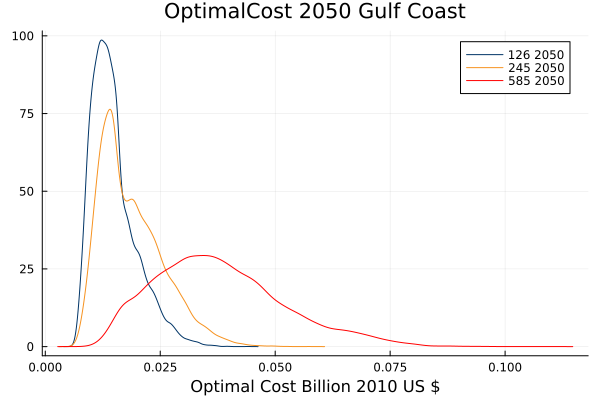

In [106]:
StatsPlots.plot(kde(oc_2050_126[28,:]),color = RGB(0/255,52/255,102/255), label = "126 2050", title = "OptimalCost 2050 Gulf Coast", xlabel = "Optimal Cost Billion 2010 US \$")
StatsPlots.plot!(kde(oc_2050_245[28,:]), color = RGB(246/255,146/255,32/255), label = "245 2050")
StatsPlots.plot!(kde(oc_2050_585[28,:]), color = RGB(255/255,0/255,0/255), label = "585 2050")

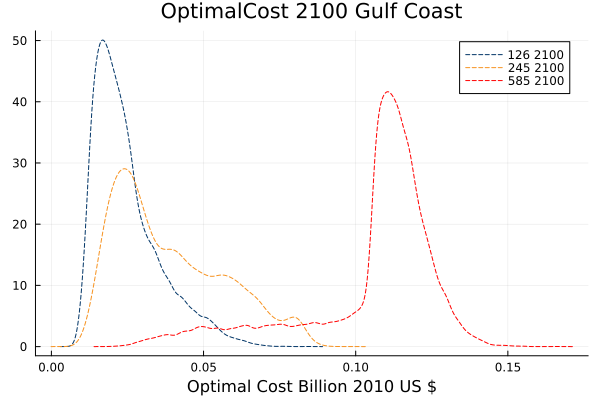

In [108]:
StatsPlots.plot(kde(oc_2100_126[28,:]), line = (1, :dash), color = RGB(0/255,52/255,102/255), label = "126 2100", title = "OptimalCost 2100 Gulf Coast", xlabel = "Optimal Cost Billion 2010 US \$")
StatsPlots.plot!(kde(oc_2100_245[28,:]), line = (1, :dash), color = RGB(246/255,146/255,32/255), label = "245 2100")
StatsPlots.plot!(kde(oc_2100_585[28,:]), line = (1, :dash), color = RGB(255/255,0/255,0/255), label = "585 2100")

In [17]:


test = []

push!(test, oc_2050_245[28, 1])
push!(test, oc_2050_245[28,2])

again = []
push!(again, oc_2050_245[28, 5])
push!(again, oc_2050_245[28,6])

hcat(test, again)

2×2 Matrix{Float64}:
 0.0290641  0.0152518
 0.0169307  0.0251161

In [31]:
oc_2050_245[28,41]


0.022159648127600722

In [49]:

function model_costs(data)
    model_data = []
    for i in range(1,20)
        m = []
        push!(m, data[28, i])
        for j in range(2,1000)
            push!(m, data[28, 20(j-1) + i])
        end
        
        if i == 1
            model_data = m
        else
            model_data = hcat(model_data, m)
        end
    end

    return model_data
end

model_costs (generic function with 1 method)

In [54]:
oc_2050_245_models = model_costs(oc_2050_245)
oc_2100_245_models = model_costs(oc_2100_245)
na_2050_245_models = model_costs(na_2050_245)
na_2100_245_models = model_costs(na_2100_245)

1000×20 Matrix{Any}:
 0.142665   0.0707318  0.155737   …  0.0722871  0.0756188  0.188454
 0.16506    0.120102   0.13182       0.106784   0.133807   0.179635
 0.11092    0.0438617  0.046558      0.126469   0.0689802  0.167429
 0.142063   0.153164   0.102867      0.0429045  0.0928543  0.162058
 0.144749   0.0933581  0.13698       0.0494137  0.0526505  0.125561
 0.106169   0.0697134  0.0576501  …  0.0559982  0.0369365  0.108336
 0.180994   0.0517978  0.0608826     0.0415919  0.121326   0.138392
 0.125391   0.0505795  0.05261       0.0515426  0.0452752  0.0692802
 0.0738602  0.0507117  0.0599269     0.0505965  0.0382698  0.110174
 0.132488   0.0542663  0.126262      0.04063    0.0413727  0.117284
 0.107439   0.141733   0.0430461  …  0.115302   0.0276158  0.0700174
 0.192414   0.17793    0.176265      0.0909204  0.0488228  0.18003
 0.180249   0.0693206  0.0557499     0.114577   0.0531366  0.11012
 ⋮                                ⋱                        
 0.139085   0.0718858  0.0409752   

In [72]:
gulf_segments = Matrix(CSV.read("gulf_segments.csv", DataFrame))
lonlat_gulf = Matrix(CSV.read("lonlat_gulf_list.csv", DataFrame))

178×2 Matrix{Float64}:
 -87.39   30.47
 -87.961  30.675
 -87.917  30.604
 -87.911  30.562
 -87.923  30.521
 -87.944  30.227
 -88.156  30.324
 -88.063  30.615
 -88.031  30.679
 -88.443  30.329
 -89.418  30.212
 -89.26   30.319
 -89.173  30.335
   ⋮      
 -94.923  29.711
 -94.744  29.374
 -93.935  29.854
 -93.908  29.896
 -93.885  29.933
 -94.831  29.332
 -94.82   29.338
 -94.801  29.328
 -94.783  29.315
 -94.8    29.298
 -94.821  29.283
 -94.848  29.263

In [82]:
index = 0
for i in range(1,size(lonlat_gulf,1))
    if lonlat_gulf[i,2] == 29.271 && lonlat_gulf[i,1] == -89.648
        index = i
    end
end
index

28

No Adapt

In [53]:
na_2050_126 = Matrix(CSV.read("data/ssprcp_126/NoAdaptCost_Gulf_2050_126.csv", DataFrame))
na_2050_245 = Matrix(CSV.read("data/ssprcp_245/NoAdaptCost_Gulf_2050_245.csv", DataFrame))
na_2050_585 = Matrix(CSV.read("data/ssprcp_585/NoAdaptCost_Gulf_2050_585.csv", DataFrame))

na_2100_126 = Matrix(CSV.read("data/ssprcp_126/NoAdaptCost_Gulf_2100_126.csv", DataFrame))
na_2100_245 = Matrix(CSV.read("data/ssprcp_245/NoAdaptCost_Gulf_2100_245.csv", DataFrame))
na_2100_585 = Matrix(CSV.read("data/ssprcp_585/NoAdaptCost_Gulf_2100_585.csv", DataFrame))


178×20000 Matrix{Float64}:
 0.105796   0.0838382  0.100229   …  0.0765601  0.0402717   0.0970112
 0.533001   0.457325   0.513872      0.432832   0.321618    0.502813
 0.152399   0.118029   0.143714      0.106932   0.0733107   0.138693
 0.216175   0.191198   0.209861      0.183111   0.151978    0.206211
 0.791432   0.61083    0.745792      0.552504   0.318183    0.719407
 0.740208   0.574738   0.69835    …  0.52082    0.191144    0.674153
 0.0196541  0.0151804  0.0185184     0.0136943  0.00939423  0.0178636
 0.698293   0.625511   0.680816      0.599679   0.350518    0.669963
 0.245927   0.18413    0.230135      0.162131   0.136706    0.221034
 0.445321   0.347647   0.420552      0.315409   0.29923     0.40627
 0.351442   0.280849   0.333467   …  0.256544   0.251737    0.323132
 1.18785    0.990434   1.13776       0.808349   0.526556    1.10895
 2.49206    2.29098    2.44109       2.22515    2.21369     2.41177
 ⋮                                ⋱                         
 1.87309    1.86

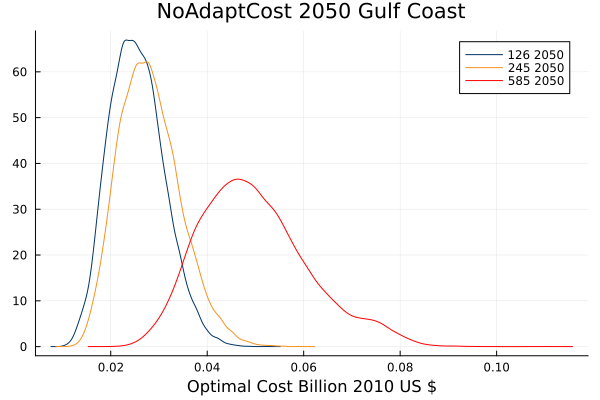

In [110]:
StatsPlots.plot(kde(na_2050_126[28,:]),color = RGB(0/255,52/255,102/255), label = "126 2050", title = "NoAdaptCost 2050 Gulf Coast", xlabel = "Optimal Cost Billion 2010 US \$")
StatsPlots.plot!(kde(na_2050_245[28,:]), color = RGB(246/255,146/255,32/255), label = "245 2050")
StatsPlots.plot!(kde(na_2050_585[28,:]), color = RGB(255/255,0/255,0/255), label = "585 2050")

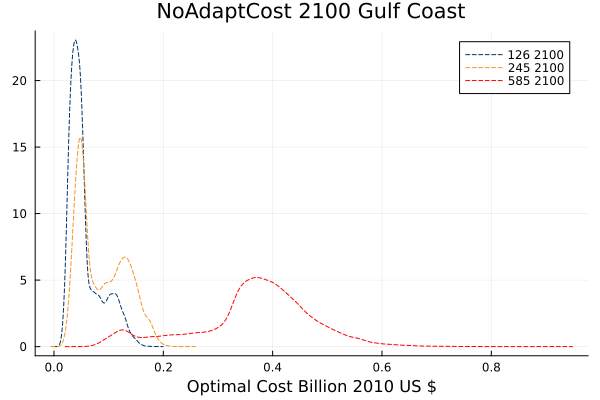

In [111]:
StatsPlots.plot(kde(na_2100_126[28,:]), line = (1, :dash), color = RGB(0/255,52/255,102/255), label = "126 2100", title = "NoAdaptCost 2100 Gulf Coast", xlabel = "Optimal Cost Billion 2010 US \$")
StatsPlots.plot!(kde(na_2100_245[28,:]), line = (1, :dash), color = RGB(246/255,146/255,32/255), label = "245 2100")
StatsPlots.plot!(kde(na_2100_585[28,:]), line = (1, :dash), color = RGB(255/255,0/255,0/255), label = "585 2100")

Boxplots for models

In [45]:
function cost_boxplots(data, ssprcp, cost_type, year)

    mymodels = ["ACCESS-CM2", "ACCESS-ESM1-5", "CMCC-CM2-SR5", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "CanESM5", "EC-Earth3", "EC-Earth3-Veg", "HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]


    boxplot(data[:,1], label = mymodels[1], title = "$cost_type in $year for $ssprcp", legend = :outertopright, xaxis = false, ylabel = "Billion US 2010 Dollars")
    for i in range(2, 20)
        boxplot!(data[:,i], label = mymodels[i])
    end
    StatsPlots.savefig(string(cost_type, "_", "$year", "_", "$ssprcp", "Gulf.png"))
end


cost_boxplots (generic function with 1 method)

In [55]:
cost_boxplots(oc_2050_245_models, 245, "OptimalCost", 2050)
cost_boxplots(oc_2100_245_models, 245, "OptimalCost", 2100)
cost_boxplots(na_2050_245_models, 245, "NoAdaptCost", 2050)
cost_boxplots(na_2100_245_models, 245, "NoAdaptCost", 2100)


"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\NoAdaptCost_2100_245Gulf.png"